Epoch [100/1000], Loss: 3906.6040
Epoch [200/1000], Loss: 1351.7207
Epoch [300/1000], Loss: 2817.6755
Epoch [400/1000], Loss: 1606.9626
Epoch [500/1000], Loss: 970.6574
Epoch [600/1000], Loss: 1842.8527
Epoch [700/1000], Loss: 3138.8438
Epoch [800/1000], Loss: 936.3218
Epoch [900/1000], Loss: 1162.4263
Epoch [1000/1000], Loss: 800.9478


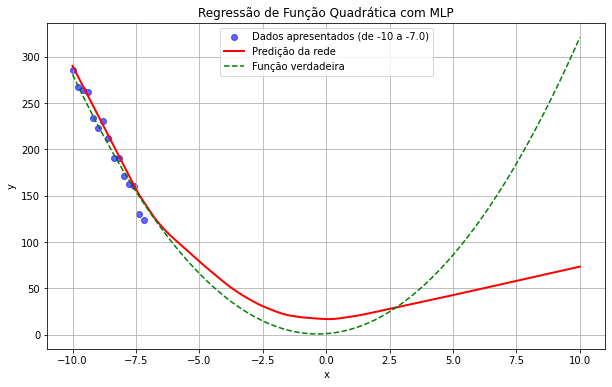

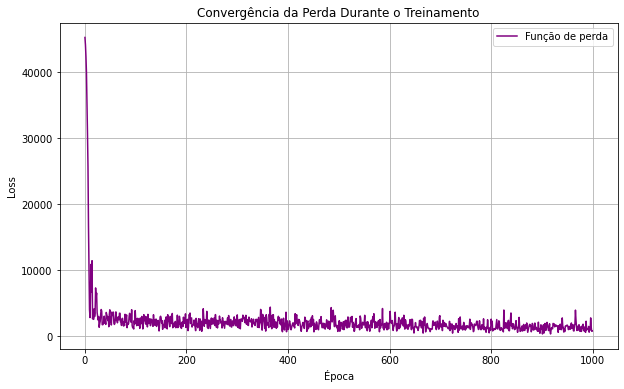

In [16]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função quadrática
true_function = lambda x: 3 * x**2 + 2 * x + 1

# Gerando dados sintéticos
np.random.seed(42)
x_full = np.linspace(-10, 10, 100)
y_full = true_function(x_full) + np.random.normal(0, 10, size=x_full.shape)

# Variável de controle para porcentagem dos dados apresentados
data_percent = 0.3
range_start = -10
range_end = range_start + (range_start + 20) * data_percent

x_train = x_full[(x_full >= range_start) & (x_full <= range_end)]
y_train = y_full[(x_full >= range_start) & (x_full <= range_end)]

# Convertendo para tensores PyTorch
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1) # Shape: (N, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Shape: (N, 1)

# Função para criar a função de ativação
def get_activation_function(name):
    if name.lower() == "relu":
        return nn.ReLU()
    elif name.lower() == "tanh":
        return nn.Tanh()
    elif name.lower() == "sigmoid":
        return nn.Sigmoid()
    elif name.lower() == "leakyrelu":
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Função de ativação desconhecida: {name}")

# Definindo a estrutura da rede neural com regularização e dropout
class MLP(nn.Module):
    def __init__(self, neurons_per_layer, activations, dropouts):
        super(MLP, self).__init__()

        if not (len(neurons_per_layer) == len(activations) == len(dropouts)):
            raise ValueError("Os arrays neurons_per_layer, activations e dropouts devem ter o mesmo tamanho.")

        layers = []
        input_dim = 1  # Dimensão de entrada inicial

        for i in range(len(neurons_per_layer)):
            layers.append(nn.Linear(input_dim, neurons_per_layer[i]))
            layers.append(get_activation_function(activations[i]))
            layers.append(nn.Dropout(dropouts[i]))
            input_dim = neurons_per_layer[i]  # Atualização do tamanho da próxima entrada

        layers.append(nn.Linear(input_dim, 1))  # Camada de saída
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Inicializando a rede neural, o otimizador e a função de perda
neurons_per_layer = [64, 64, 64]  # Número de neurônios por camada
activations = ["relu", "relu", "relu"]  # Funções de ativação
dropouts = [0.2, 0.2, 0.2]  # Valores de dropout por camada

model = MLP(neurons_per_layer, activations, dropouts)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinando a rede neural
num_epochs = 1000
loss_history = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Exibindo progresso
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Avaliando o modelo
model.eval()
x_test = torch.linspace(-10, 10, 100).unsqueeze(1)
y_test_pred = model(x_test).detach().numpy()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label=f"Dados apresentados (de {range_start} a {range_end})", color="blue", alpha=0.6)
plt.plot(x_test.numpy(), y_test_pred, label="Predição da rede", color="red", linewidth=2)
plt.plot(x_full, true_function(x_full), label="Função verdadeira", color="green", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão de Função Quadrática com MLP")
plt.legend()
plt.grid()
plt.show()

# Plotando a curva de perda
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history, label="Função de perda", color="purple")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Convergência da Perda Durante o Treinamento")
plt.grid()
plt.legend()
plt.show()


Epoch [100/1000] - Loss Treino: 1757.9727, Validação: 1629.5499, Teste: 893.3945
Epoch [200/1000] - Loss Treino: 948.6848, Validação: 583.3845, Teste: 272.1732
Epoch [300/1000] - Loss Treino: 592.2910, Validação: 68.1875, Teste: 379.3776
Epoch [400/1000] - Loss Treino: 450.9667, Validação: 356.0702, Teste: 170.1664
Epoch [500/1000] - Loss Treino: 941.8274, Validação: 199.4368, Teste: 106.5441
Epoch [600/1000] - Loss Treino: 657.9978, Validação: 124.4752, Teste: 77.7945
Epoch [700/1000] - Loss Treino: 1001.6892, Validação: 76.8636, Teste: 86.2027
Epoch [800/1000] - Loss Treino: 603.8411, Validação: 392.6517, Teste: 341.8553
Epoch [900/1000] - Loss Treino: 950.7087, Validação: 516.4603, Teste: 839.2969
Epoch [1000/1000] - Loss Treino: 922.9820, Validação: 203.2131, Teste: 105.6745


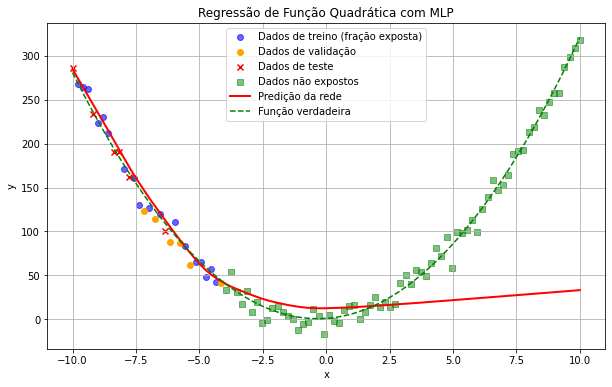

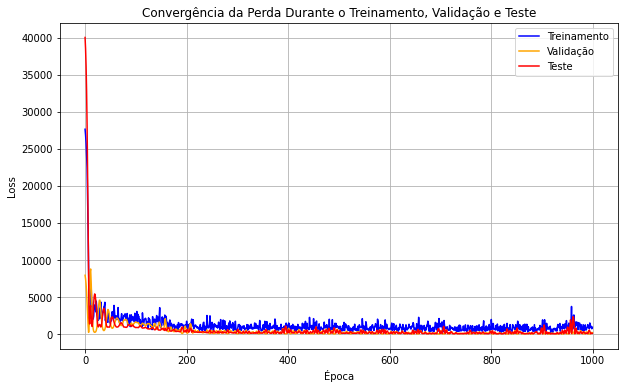

In [22]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função quadrática
true_function = lambda x: 3 * x**2 + 2 * x + 1

# Gerando dados sintéticos
np.random.seed(42)
x_full = np.linspace(-10, 10, 100)
y_full = true_function(x_full) + np.random.normal(0, 10, size=x_full.shape)

# Selecionando a fração de dados a ser exposta
exposed_fraction = 0.3
range_start = -10
range_end = range_start + (20 * exposed_fraction)

# Filtrando os dados para a fração exposta
data_exposed = [(x, y) for x, y in zip(x_full, y_full) if range_start <= x <= range_end]
data_unexposed = [(x, y) for x, y in zip(x_full, y_full) if x < range_start or x > range_end]

# Embaralhando os dados dentro da fração exposta
np.random.shuffle(data_exposed)

# Dividindo os dados expostos em treino e validação/teste
train_split = int(len(data_exposed) * 0.6)
val_split = int(len(data_exposed) * 0.8)

train_data = data_exposed[:train_split]
val_data = data_exposed[train_split:val_split]
test_data = data_exposed[val_split:]

# Extraindo dados não expostos
x_unexposed, y_unexposed = zip(*data_unexposed)

# Convertendo dados para tensores PyTorch
x_train, y_train = zip(*train_data)
x_val, y_val = zip(*val_data)
x_test, y_test = zip(*test_data)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Função para criar a função de ativação
def get_activation_function(name):
    if name.lower() == "relu":
        return nn.ReLU()
    elif name.lower() == "tanh":
        return nn.Tanh()
    elif name.lower() == "sigmoid":
        return nn.Sigmoid()
    elif name.lower() == "leakyrelu":
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Função de ativação desconhecida: {name}")

# Definindo a estrutura da rede neural com regularização e dropout
class MLP(nn.Module):
    def __init__(self, neurons_per_layer, activations, dropouts):
        super(MLP, self).__init__()

        if not (len(neurons_per_layer) == len(activations) == len(dropouts)):
            raise ValueError("Os arrays neurons_per_layer, activations e dropouts devem ter o mesmo tamanho.")

        layers = []
        input_dim = 1  # Dimensão de entrada inicial

        for i in range(len(neurons_per_layer)):
            layers.append(nn.Linear(input_dim, neurons_per_layer[i]))
            layers.append(get_activation_function(activations[i]))
            layers.append(nn.Dropout(dropouts[i]))
            input_dim = neurons_per_layer[i]  # Atualização do tamanho da próxima entrada

        layers.append(nn.Linear(input_dim, 1))  # Camada de saída
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Inicializando a rede neural, o otimizador e a função de perda
neurons_per_layer = [64, 64, 64]  # Número de neurônios por camada
activations = ["relu", "relu", "relu"]  # Funções de ativação
dropouts = [0.2, 0.2, 0.2]  # Valores de dropout por camada

model = MLP(neurons_per_layer, activations, dropouts)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinando a rede neural
num_epochs = 1000
loss_history_train = []
loss_history_val = []
loss_history_test = []

for epoch in range(num_epochs):
    # Forward pass - Treinamento
    model.train()
    y_pred_train = model(x_train_tensor)
    loss_train = criterion(y_pred_train, y_train_tensor)

    # Backward pass e otimizador
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    # Armazenando perda de treinamento
    loss_history_train.append(loss_train.item())

    # Validação
    model.eval()
    with torch.no_grad():
        y_pred_val = model(x_val_tensor)
        loss_val = criterion(y_pred_val, y_val_tensor)
        loss_history_val.append(loss_val.item())

        y_pred_test = model(x_test_tensor)
        loss_test = criterion(y_pred_test, y_test_tensor)
        loss_history_test.append(loss_test.item())

    # Exibindo progresso
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] - Loss Treino: {loss_train.item():.4f}, Validação: {loss_val.item():.4f}, Teste: {loss_test.item():.4f}")

# Avaliando o modelo
model.eval()
x_test_full = torch.linspace(-10, 10, 100).unsqueeze(1)
y_test_pred_full = model(x_test_full).detach().numpy()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label=f"Dados de treino (fração exposta)", color="blue", alpha=0.6)
plt.scatter(x_val, y_val, label="Dados de validação", color="orange", marker="o")
plt.scatter(x_test, y_test, label="Dados de teste", color="red", marker="x")
plt.scatter(x_unexposed, y_unexposed, label="Dados não expostos", color="green", marker="s", alpha=0.5)
plt.plot(x_test_full.numpy(), y_test_pred_full, label="Predição da rede", color="red", linewidth=2)
plt.plot(x_full, true_function(x_full), label="Função verdadeira", color="green", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão de Função Quadrática com MLP")
plt.legend()
plt.grid()
plt.show()

# Plotando as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history_train, label="Treinamento", color="blue")
plt.plot(range(num_epochs), loss_history_val, label="Validação", color="orange")
plt.plot(range(num_epochs), loss_history_test, label="Teste", color="red")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Convergência da Perda Durante o Treinamento, Validação e Teste")
plt.legend()
plt.grid()
plt.show()


Epoch [100/1000], Loss: 1613.2866
Epoch [200/1000], Loss: 1298.4358
Epoch [300/1000], Loss: 1352.3412
Epoch [400/1000], Loss: 1223.5542
Epoch [500/1000], Loss: 1516.9569
Epoch [600/1000], Loss: 1383.5636
Epoch [700/1000], Loss: 894.1550
Epoch [800/1000], Loss: 898.4144
Epoch [900/1000], Loss: 931.9048
Epoch [1000/1000], Loss: 1199.1519


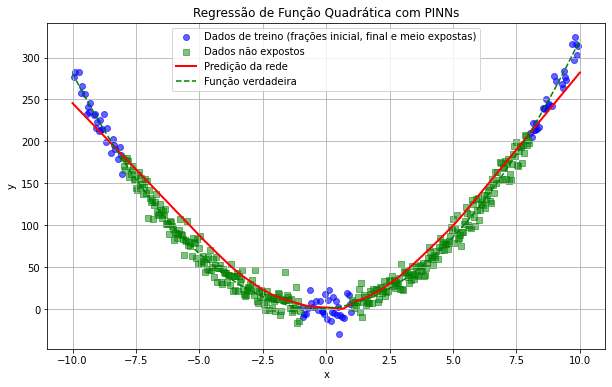

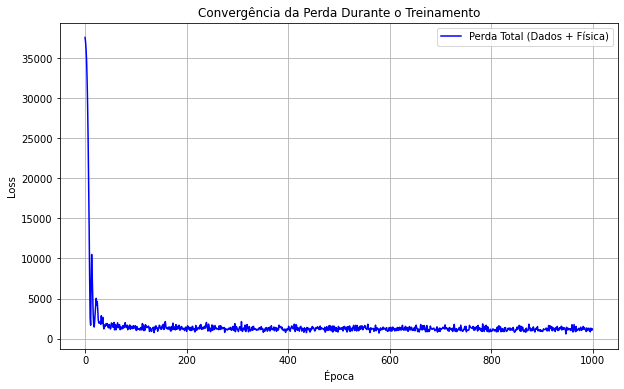

In [39]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função quadrática
true_function = lambda x: 3 * x**2 + 2 * x + 1

# Gerando dados sintéticos
np.random.seed(42)
x_full = np.linspace(-10, 10, 500)  # Mais pontos no intervalo
y_full = true_function(x_full) + np.random.normal(0, 10, size=x_full.shape)

# Selecionando as frações inicial, final e do meio de dados a serem expostas
exposed_fraction_initial = 0.1
exposed_fraction_final = 0.1
exposed_fraction_middle = 0.1

initial_end = -10 + (20 * exposed_fraction_initial)
final_start = 10 - (20 * exposed_fraction_final)
middle_start = -10 + (20 * (0.5 - exposed_fraction_middle / 2))
middle_end = -10 + (20 * (0.5 + exposed_fraction_middle / 2))

# Filtrando os dados para as frações inicial, final e do meio expostas
data_exposed = [(x, y) for x, y in zip(x_full, y_full) if (x <= initial_end or x >= final_start or (middle_start <= x <= middle_end))]
data_unexposed = [(x, y) for x, y in zip(x_full, y_full) if (x > initial_end and x < middle_start) or (x > middle_end and x < final_start)]

# Embaralhando os dados expostos
np.random.shuffle(data_exposed)

# Dividindo os dados expostos em treino e validação/teste
train_split = int(len(data_exposed) * 0.6)
val_split = int(len(data_exposed) * 0.8)

train_data = data_exposed[:train_split]
val_data = data_exposed[train_split:val_split]
test_data = data_exposed[val_split:]

# Extraindo dados não expostos
x_unexposed, y_unexposed = zip(*data_unexposed)

# Convertendo dados para tensores PyTorch
x_train, y_train = zip(*train_data)
x_val, y_val = zip(*val_data)
x_test, y_test = zip(*test_data)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Função para criar a função de ativação
def get_activation_function(name):
    if name.lower() == "relu":
        return nn.ReLU()
    elif name.lower() == "tanh":
        return nn.Tanh()
    elif name.lower() == "sigmoid":
        return nn.Sigmoid()
    elif name.lower() == "leakyrelu":
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Função de ativação desconhecida: {name}")

# Definindo a estrutura da rede neural com regularização e dropout
class PINN(nn.Module):
    def __init__(self, neurons_per_layer, activations, dropouts):
        super(PINN, self).__init__()

        if not (len(neurons_per_layer) == len(activations) == len(dropouts)):
            raise ValueError("Os arrays neurons_per_layer, activations e dropouts devem ter o mesmo tamanho.")

        layers = []
        input_dim = 1  # Dimensão de entrada inicial

        for i in range(len(neurons_per_layer)):
            layers.append(nn.Linear(input_dim, neurons_per_layer[i]))
            layers.append(get_activation_function(activations[i]))
            layers.append(nn.Dropout(dropouts[i]))
            input_dim = neurons_per_layer[i]  # Atualização do tamanho da próxima entrada

        layers.append(nn.Linear(input_dim, 1))  # Camada de saída
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Inicializando a rede neural
neurons_per_layer = [64, 64, 64]  # Número de neurônios por camada
activations = ["relu", "relu", "relu"]  # Funções de ativação
dropouts = [0.2, 0.2, 0.2]  # Valores de dropout por camada

model = PINN(neurons_per_layer, activations, dropouts)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Função de custo com dados e física
def pinn_loss(model, x, y, lambda_phys=1.0):
    # Erro nos dados
    y_pred = model(x)
    data_loss = nn.MSELoss()(y_pred, y)

    # Erro na física: d^2y/dx^2 = 6
    x.requires_grad = True
    y_pred = model(x)
    dy_dx = torch.autograd.grad(outputs=y_pred, inputs=x, grad_outputs=torch.ones_like(y_pred), create_graph=True)[0]
    d2y_dx2 = torch.autograd.grad(outputs=dy_dx, inputs=x, grad_outputs=torch.ones_like(dy_dx), create_graph=True)[0]

    physics_loss = nn.MSELoss()(d2y_dx2, torch.full_like(d2y_dx2, 6.0))

    return data_loss + lambda_phys * physics_loss

# Treinando a rede neural
num_epochs = 1000
lambda_phys = 1  # Peso para o termo da física
loss_history = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    loss = pinn_loss(model, x_train_tensor, y_train_tensor, lambda_phys=lambda_phys)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Exibindo progresso
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Avaliando o modelo
model.eval()
x_test_full = torch.linspace(-10, 10, 500).unsqueeze(1)
y_test_pred_full = model(x_test_full).detach().numpy()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label=f"Dados de treino (frações inicial, final e meio expostas)", color="blue", alpha=0.6)
plt.scatter(x_unexposed, y_unexposed, label="Dados não expostos", color="green", marker="s", alpha=0.5)
plt.plot(x_test_full.numpy(), y_test_pred_full, label="Predição da rede", color="red", linewidth=2)
plt.plot(x_full, true_function(x_full), label="Função verdadeira", color="green", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão de Função Quadrática com PINNs")
plt.legend()
plt.grid()
plt.show()

# Plotando a curva de perda
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history, label="Perda Total (Dados + Física)", color="blue")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Convergência da Perda Durante o Treinamento")
plt.legend()
plt.grid()
plt.show()


[I 2025-01-13 20:39:58,994] A new study created in memory with name: no-name-db8bda79-abfd-4801-adb8-989f9f3444b5
[I 2025-01-13 20:39:59,735] Trial 0 finished with value: 0.5185655355453491 and parameters: {'num_layers': 2, 'n_units_l0': 85, 'n_units_l1': 89, 'activation_l0': 'tanh', 'activation_l1': 'sigmoid', 'dropout_l0': 0.20597926146878232, 'dropout_l1': 0.25316717475688477, 'lr': 0.0006481633248786196}. Best is trial 0 with value: 0.5185655355453491.
[I 2025-01-13 20:40:00,545] Trial 1 finished with value: 0.36518147587776184 and parameters: {'num_layers': 3, 'n_units_l0': 36, 'n_units_l1': 28, 'n_units_l2': 61, 'activation_l0': 'leakyrelu', 'activation_l1': 'tanh', 'activation_l2': 'tanh', 'dropout_l0': 0.004603788048661628, 'dropout_l1': 0.13202270988985737, 'dropout_l2': 0.04482622100918926, 'lr': 0.0031932753107193805}. Best is trial 1 with value: 0.36518147587776184.
[I 2025-01-13 20:40:02,010] Trial 2 finished with value: 0.5080678462982178 and parameters: {'num_layers': 5,

Melhores parâmetros: {'num_layers': 4, 'n_units_l0': 51, 'n_units_l1': 106, 'n_units_l2': 111, 'n_units_l3': 105, 'activation_l0': 'relu', 'activation_l1': 'tanh', 'activation_l2': 'relu', 'activation_l3': 'leakyrelu', 'dropout_l0': 0.07824320709992173, 'dropout_l1': 0.12316136188948928, 'dropout_l2': 0.002568792765615509, 'dropout_l3': 0.40956967687175344, 'lr': 0.004260975567122596}
Epoch [100/1000], Loss Treino: 0.3131, Validação: 0.3132
Epoch [200/1000], Loss Treino: 0.1960, Validação: 0.1606
Epoch [300/1000], Loss Treino: 0.1474, Validação: 0.0780
Epoch [400/1000], Loss Treino: 0.1044, Validação: 0.0502
Epoch [500/1000], Loss Treino: 0.1000, Validação: 0.0362
Epoch [600/1000], Loss Treino: 0.0849, Validação: 0.0390
Epoch [700/1000], Loss Treino: 0.0809, Validação: 0.0358
Epoch [800/1000], Loss Treino: 0.0731, Validação: 0.0429
Epoch [900/1000], Loss Treino: 0.0685, Validação: 0.0350
Epoch [1000/1000], Loss Treino: 0.0682, Validação: 0.0338


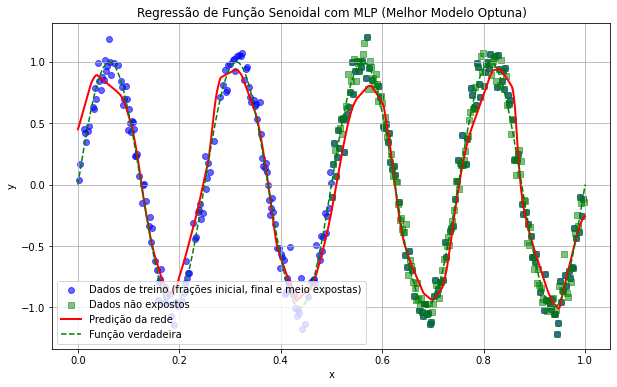

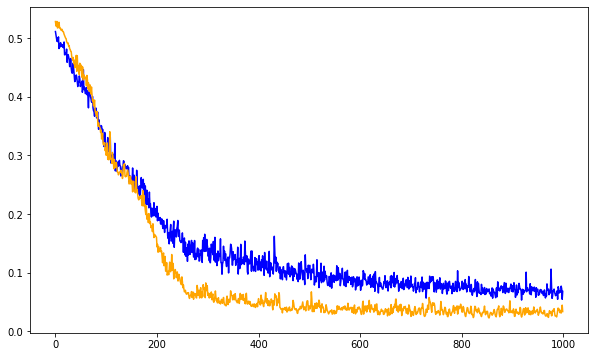

In [9]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import optuna

# Definindo a função seno com 4 períodos
true_function = lambda x: np.sin(2 * np.pi * 4 * x)

# Gerando dados sintéticos
np.random.seed(42)
x_full = np.linspace(0, 1, 500)  # 4 períodos completos no intervalo [0, 1]
y_full = true_function(x_full) + np.random.normal(0, 0.1, size=x_full.shape)  # Adicionando ruído

# Selecionando as frações inicial, final e do meio de dados a serem expostas
exposed_fraction_initial = 1
exposed_fraction_final = 0.0
exposed_fraction_middle = 0.0

initial_end = 0 + exposed_fraction_initial
final_start = 1 - exposed_fraction_final
middle_start = 0.5 - (exposed_fraction_middle / 2)
middle_end = 0.5 + (exposed_fraction_middle / 2)

# Filtrando os dados para as frações inicial, final e do meio expostas
data_exposed = [(x, y) for x, y in zip(x_full, y_full) if (x <= initial_end or x >= final_start or (middle_start <= x <= middle_end))]
data_unexposed = [(x, y) for x, y in zip(x_full, y_full) if (x > initial_end and x < middle_start) or (x > middle_end and x < final_start)]

# Embaralhando os dados expostos
np.random.shuffle(data_exposed)

# Dividindo os dados expostos em treino e validação/teste
train_split = int(len(data_exposed) * 0.6)
val_split = int(len(data_exposed) * 0.8)

train_data = data_exposed[:train_split]
val_data = data_exposed[train_split:val_split]
test_data = data_exposed[val_split:]

# Extraindo dados não expostos
x_unexposed, y_unexposed = zip(*data_unexposed)

# Convertendo dados para tensores PyTorch
x_train, y_train = zip(*train_data)
x_val, y_val = zip(*val_data)
x_test, y_test = zip(*test_data)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Função para criar a função de ativação
def get_activation_function(name):
    if name.lower() == "relu":
        return nn.ReLU()
    elif name.lower() == "tanh":
        return nn.Tanh()
    elif name.lower() == "sigmoid":
        return nn.Sigmoid()
    elif name.lower() == "leakyrelu":
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Função de ativação desconhecida: {name}")

# Função para criar o modelo dinâmico com base nos parâmetros do Optuna
def create_model(trial):
    # Configuração da rede
    num_layers = trial.suggest_int("num_layers", 2, 5)
    neurons_per_layer = [trial.suggest_int(f"n_units_l{i}", 16, 128) for i in range(num_layers)]
    activations = [trial.suggest_categorical(f"activation_l{i}", ["relu", "tanh", "sigmoid", "leakyrelu"]) for i in range(num_layers)]
    dropouts = [trial.suggest_float(f"dropout_l{i}", 0.0, 0.5) for i in range(num_layers)]

    layers = []
    input_dim = 1
    for i in range(num_layers):
        layers.append(nn.Linear(input_dim, neurons_per_layer[i]))
        layers.append(get_activation_function(activations[i]))
        layers.append(nn.Dropout(dropouts[i]))
        input_dim = neurons_per_layer[i]
    layers.append(nn.Linear(input_dim, 1))  # Saída

    return nn.Sequential(*layers)

# Objetivo para o Optuna
def objective(trial):
    # Criar o modelo
    model = create_model(trial)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=trial.suggest_float("lr", 1e-4, 1e-2, log=True))

    # Treinamento
    num_epochs = 500
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        y_pred_train = model(x_train_tensor)
        loss_train = criterion(y_pred_train, y_train_tensor)
        loss_train.backward()
        optimizer.step()

    # Avaliação
    model.eval()
    with torch.no_grad():
        y_pred_val = model(x_val_tensor)
        loss_val = criterion(y_pred_val, y_val_tensor)

    return loss_val.item()

# Executando o estudo do Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Melhor conjunto de hiperparâmetros
best_params = study.best_params
print("Melhores parâmetros:", best_params)

# Treinando o melhor modelo
best_model = create_model(optuna.trial.FixedTrial(best_params))
criterion = nn.MSELoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_params["lr"])

num_epochs = 1000
loss_history_train = []
loss_history_val = []

for epoch in range(num_epochs):
    best_model.train()
    optimizer.zero_grad()
    y_pred_train = best_model(x_train_tensor)
    loss_train = criterion(y_pred_train, y_train_tensor)
    loss_train.backward()
    optimizer.step()

    loss_history_train.append(loss_train.item())

    best_model.eval()
    with torch.no_grad():
        y_pred_val = best_model(x_val_tensor)
        loss_val = criterion(y_pred_val, y_val_tensor)
        loss_history_val.append(loss_val.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss Treino: {loss_train.item():.4f}, Validação: {loss_val.item():.4f}")

# Avaliando o modelo final
best_model.eval()
x_test_full = torch.linspace(0, 1, 500).unsqueeze(1)
y_test_pred_full = best_model(x_test_full).detach().numpy()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label=f"Dados de treino (frações inicial, final e meio expostas)", color="blue", alpha=0.6)
plt.scatter(x_unexposed, y_unexposed, label="Dados não expostos", color="green", marker="s", alpha=0.5)
plt.plot(x_test_full.numpy(), y_test_pred_full, label="Predição da rede", color="red", linewidth=2)
plt.plot(x_full, true_function(x_full), label="Função verdadeira", color="green", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão de Função Senoidal com MLP (Melhor Modelo Optuna)")
plt.legend()
plt.grid()
plt.show()

# Plotando as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history_train, label="Treinamento", color="blue")
plt.plot(range(num_epochs), loss_history_val, label="Validação", color="orange")


In [11]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import optuna

# Definindo a função seno com 4 períodos
true_function = lambda x: np.sin(2 * np.pi * 4 * x)

# Gerando dados sintéticos
np.random.seed(42)
x_full = np.linspace(0, 1, 500)  # 4 períodos completos no intervalo [0, 1]
y_full = true_function(x_full) + np.random.normal(0, 0.1, size=x_full.shape)  # Adicionando ruído

# Selecionando as frações inicial, final e do meio de dados a serem expostas
exposed_fraction_initial = 0.1
exposed_fraction_final = 0.1
exposed_fraction_middle = 0.1

initial_end = 0 + exposed_fraction_initial
final_start = 1 - exposed_fraction_final
middle_start = 0.5 - (exposed_fraction_middle / 2)
middle_end = 0.5 + (exposed_fraction_middle / 2)

# Filtrando os dados para as frações inicial, final e do meio expostas
data_exposed = [(x, y) for x, y in zip(x_full, y_full) if (x <= initial_end or x >= final_start or (middle_start <= x <= middle_end))]
data_unexposed = [(x, y) for x, y in zip(x_full, y_full) if (x > initial_end and x < middle_start) or (x > middle_end and x < final_start)]

# Embaralhando os dados expostos
np.random.shuffle(data_exposed)

# Dividindo os dados expostos em treino e validação/teste
train_split = int(len(data_exposed) * 0.6)
val_split = int(len(data_exposed) * 0.8)

train_data = data_exposed[:train_split]
val_data = data_exposed[train_split:val_split]
test_data = data_exposed[val_split:]

# Extraindo dados não expostos
x_unexposed, y_unexposed = zip(*data_unexposed)

# Convertendo dados para tensores PyTorch
x_train, y_train = zip(*train_data)
x_val, y_val = zip(*val_data)
x_test, y_test = zip(*test_data)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Função para criar a função de ativação
def get_activation_function(name):
    if name.lower() == "relu":
        return nn.ReLU()
    elif name.lower() == "tanh":
        return nn.Tanh()
    elif name.lower() == "sigmoid":
        return nn.Sigmoid()
    elif name.lower() == "leakyrelu":
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Função de ativação desconhecida: {name}")

# Função para criar o modelo dinâmico com base nos parâmetros do Optuna
def create_model(trial):
    # Configuração da rede
    num_layers = trial.suggest_int("num_layers", 2, 5)
    neurons_per_layer = [trial.suggest_int(f"n_units_l{i}", 16, 128) for i in range(num_layers)]
    activations = [trial.suggest_categorical(f"activation_l{i}", ["relu", "tanh", "sigmoid", "leakyrelu"]) for i in range(num_layers)]
    dropouts = [trial.suggest_float(f"dropout_l{i}", 0.0, 0.5) for i in range(num_layers)]

    layers = []
    input_dim = 1
    for i in range(num_layers):
        layers.append(nn.Linear(input_dim, neurons_per_layer[i]))
        layers.append(get_activation_function(activations[i]))
        layers.append(nn.Dropout(dropouts[i]))
        input_dim = neurons_per_layer[i]
    layers.append(nn.Linear(input_dim, 1))  # Saída

    return nn.Sequential(*layers)

# Função de custo com dados e física
def pinn_loss(model, x, y, lambda_phys=1.0):
    # Garante que x rastreia gradientes
    x = x.clone().detach().requires_grad_(True)
    
    # Erro nos dados
    y_pred = model(x)
    data_loss = nn.MSELoss()(y_pred, y)
    
    # Erro na física: d^2y/dx^2 + (2 * pi * 4)^2 * y = 0
    dy_dx = torch.autograd.grad(outputs=y_pred, inputs=x, grad_outputs=torch.ones_like(y_pred), create_graph=True)[0]
    d2y_dx2 = torch.autograd.grad(outputs=dy_dx, inputs=x, grad_outputs=torch.ones_like(dy_dx), create_graph=True)[0]
    
    physics_loss = nn.MSELoss()(d2y_dx2 + (2 * np.pi * 4)**2 * y_pred, torch.zeros_like(y_pred))
    
    return data_loss + lambda_phys * physics_loss


# Objetivo para o Optuna
def objective(trial):
    # Criar o modelo
    model = create_model(trial)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=trial.suggest_float("lr", 1e-4, 1e-2, log=True))
    lambda_phys = trial.suggest_float("lambda_phys", 0.1, 10.0)

    # Treinamento
    num_epochs = 500
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        loss = pinn_loss(model, x_train_tensor, y_train_tensor, lambda_phys=lambda_phys)
        loss.backward()
        optimizer.step()

    # Avaliação
    model.eval()
    with torch.no_grad():
        val_loss = pinn_loss(model, x_val_tensor, y_val_tensor, lambda_phys=lambda_phys)

    return val_loss.item()

# Executando o estudo do Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Melhor conjunto de hiperparâmetros
best_params = study.best_params
print("Melhores parâmetros:", best_params)

# Treinando o melhor modelo
best_model = create_model(optuna.trial.FixedTrial(best_params))
criterion = nn.MSELoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_params["lr"])

lambda_phys = best_params["lambda_phys"]
num_epochs = 1000
loss_history_train = []
loss_history_val = []

for epoch in range(num_epochs):
    best_model.train()
    optimizer.zero_grad()
    loss_train = pinn_loss(best_model, x_train_tensor, y_train_tensor, lambda_phys=lambda_phys)
    loss_train.backward()
    optimizer.step()

    loss_history_train.append(loss_train.item())

    best_model.eval()
    with torch.no_grad():
        loss_val = pinn_loss(best_model, x_val_tensor, y_val_tensor, lambda_phys=lambda_phys)
        loss_history_val.append(loss_val.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss Treino: {loss_train.item():.4f}, Validação: {loss_val.item():.4f}")

# Avaliando o modelo final
best_model.eval()
x_test_full = torch.linspace(0, 1, 500).unsqueeze(1)
y_test_pred_full = best_model(x_test_full).detach().numpy()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label=f"Dados de treino (frações inicial, final e meio expostas)", color="blue", alpha=0.6)
plt.scatter(x_unexposed, y_unexposed, label="Dados não expostos", color="green", marker="s", alpha=0.5)
plt.plot(x_test_full.numpy(), y_test_pred_full, label="Predição da rede", color="red", linewidth=2)
plt.plot(x_full, true_function(x_full), label="Função verdadeira", color="green", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão de Função Senoidal com PINNs (Melhor Modelo Optuna)")
plt.legend()
plt.grid()
plt.show()

# Plotando as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history_train, label="Treinamento", color="blue")
plt.plot(range(num_epochs), loss_history_val, label="Validação", color="orange")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Convergência da Perda Durante o Treinamento e Validação")
plt.legend()
plt.grid()
plt.show()


[I 2025-01-13 21:20:37,444] A new study created in memory with name: no-name-b00d2b4f-8ff9-47de-8f46-f677c2771b8a
[W 2025-01-13 21:20:39,093] Trial 0 failed with parameters: {'num_layers': 3, 'n_units_l0': 119, 'n_units_l1': 57, 'n_units_l2': 45, 'activation_l0': 'tanh', 'activation_l1': 'sigmoid', 'activation_l2': 'relu', 'dropout_l0': 0.07498974937655711, 'dropout_l1': 0.08907530915148104, 'dropout_l2': 0.2999101878945979, 'lr': 0.001688369053055308, 'lambda_phys': 6.761233190618901} because of the following error: RuntimeError('element 0 of tensors does not require grad and does not have a grad_fn').
Traceback (most recent call last):
  File "/home/barauna/anaconda3/lib/python3.8/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-11-3fa304317cc6>", line 129, in objective
    val_loss = pinn_loss(model, x_val_tensor, y_val_tensor, lambda_phys=lambda_phys)
  File "<ipython-input-11-3fa304317cc6>", line 101, in pin

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Epoch [100/10000], Loss Treino: 0.0789, Validação: 0.5252
Epoch [200/10000], Loss Treino: 0.0788, Validação: 0.5137
Epoch [300/10000], Loss Treino: 0.0788, Validação: 0.5046
Epoch [400/10000], Loss Treino: 0.0788, Validação: 0.5007
Epoch [500/10000], Loss Treino: 0.0788, Validação: 0.4994
Epoch [600/10000], Loss Treino: 0.0788, Validação: 0.4989
Epoch [700/10000], Loss Treino: 0.0788, Validação: 0.4985
Epoch [800/10000], Loss Treino: 0.0788, Validação: 0.4982
Epoch [900/10000], Loss Treino: 0.0788, Validação: 0.4979
Epoch [1000/10000], Loss Treino: 0.0788, Validação: 0.4977
Epoch [1100/10000], Loss Treino: 0.0788, Validação: 0.4974
Epoch [1200/10000], Loss Treino: 0.0788, Validação: 0.4973
Epoch [1300/10000], Loss Treino: 0.0788, Validação: 0.4971
Epoch [1400/10000], Loss Treino: 0.0788, Validação: 0.4970
Epoch [1500/10000], Loss Treino: 0.0788, Validação: 0.4969
Epoch [1600/10000], Loss Treino: 0.0788, Validação: 0.4969
Epoch [1700/10000], Loss Treino: 0.0788, Validação: 0.4968
Epoch 

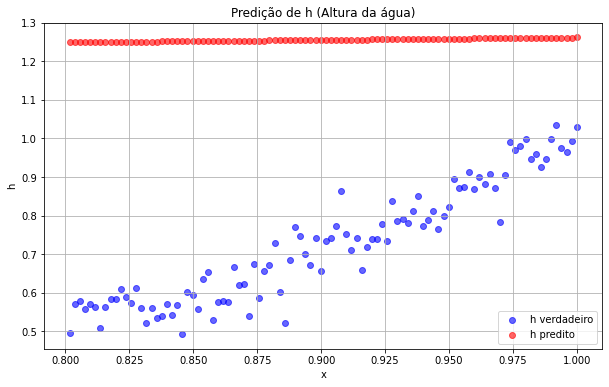

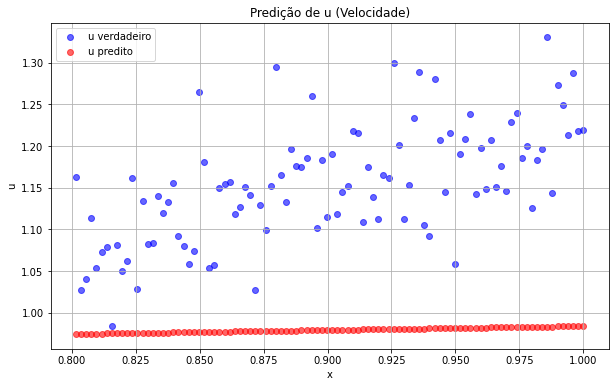

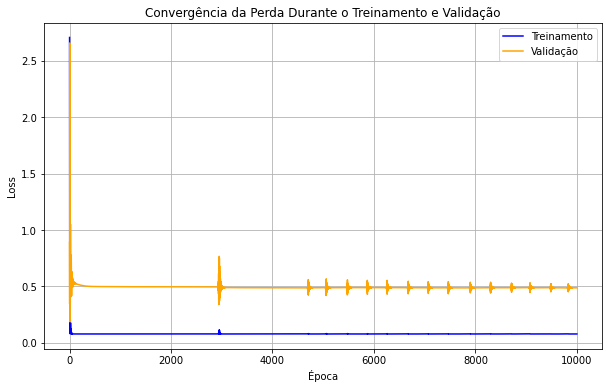

In [13]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Gerando dados sintéticos para as equações de Saint-Venant
# Para simplificar, vamos considerar soluções conhecidas no intervalo [0, 1]
x_full = np.linspace(0, 1, 500)

# Função altura da água (h) e velocidade (u) como dados de entrada
true_h = lambda x: 1 + 0.5 * np.sin(2 * np.pi * x)
true_u = lambda x: 1 + 0.2 * np.cos(2 * np.pi * x)

h_full = true_h(x_full)  # Altura
u_full = true_u(x_full)  # Velocidade

# Adicionando ruído aos dados para simular medições reais
h_full += np.random.normal(0, 0.05, size=h_full.shape)
u_full += np.random.normal(0, 0.05, size=u_full.shape)

# Dividindo os dados em treino, validação e teste
train_split = int(len(x_full) * 0.6)
val_split = int(len(x_full) * 0.8)

x_train = x_full[:train_split]
h_train = h_full[:train_split]
u_train = u_full[:train_split]

x_val = x_full[train_split:val_split]
h_val = h_full[train_split:val_split]
u_val = u_full[train_split:val_split]

x_test = x_full[val_split:]
h_test = h_full[val_split:]
u_test = u_full[val_split:]

# Convertendo dados para tensores PyTorch
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
h_train_tensor = torch.tensor(h_train, dtype=torch.float32).unsqueeze(1)
u_train_tensor = torch.tensor(u_train, dtype=torch.float32).unsqueeze(1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)
h_val_tensor = torch.tensor(h_val, dtype=torch.float32).unsqueeze(1)
u_val_tensor = torch.tensor(u_val, dtype=torch.float32).unsqueeze(1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
h_test_tensor = torch.tensor(h_test, dtype=torch.float32).unsqueeze(1)
u_test_tensor = torch.tensor(u_test, dtype=torch.float32).unsqueeze(1)

# Definindo a rede neural para prever h e u
class SaintVenantNN(nn.Module):
    def __init__(self, neurons_per_layer, activations):
        super(SaintVenantNN, self).__init__()

        layers = []
        input_dim = 1  # x como entrada

        for i, n_neurons in enumerate(neurons_per_layer):
            layers.append(nn.Linear(input_dim, n_neurons))
            if activations[i].lower() == "relu":
                layers.append(nn.ReLU())
            elif activations[i].lower() == "tanh":
                layers.append(nn.Tanh())
            elif activations[i].lower() == "sigmoid":
                layers.append(nn.Sigmoid())
            else:
                raise ValueError(f"Função de ativação desconhecida: {activations[i]}")
            input_dim = n_neurons

        # Saída para h e u
        layers.append(nn.Linear(input_dim, 2))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Hiperparâmetros
neurons_per_layer = [64, 64, 64]  # Número de neurônios por camada
activations = ["relu", "relu", "relu"]  # Funções de ativação

# Inicializando o modelo
model = SaintVenantNN(neurons_per_layer, activations)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinando a rede neural
num_epochs = 10000
loss_history_train = []
loss_history_val = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    optimizer.zero_grad()
    predictions = model(x_train_tensor)
    loss_train = criterion(predictions[:, 0], h_train_tensor) + criterion(predictions[:, 1], u_train_tensor)
    loss_train.backward()
    optimizer.step()

    loss_history_train.append(loss_train.item())

    # Validação
    model.eval()
    with torch.no_grad():
        val_predictions = model(x_val_tensor)
        loss_val = criterion(val_predictions[:, 0], h_val_tensor) + criterion(val_predictions[:, 1], u_val_tensor)
        loss_history_val.append(loss_val.item())

    # Exibindo progresso
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss Treino: {loss_train.item():.4f}, Validação: {loss_val.item():.4f}")

# Avaliando o modelo
model.eval()
with torch.no_grad():
    test_predictions = model(x_test_tensor)
    h_test_pred = test_predictions[:, 0].numpy()
    u_test_pred = test_predictions[:, 1].numpy()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_test, h_test, label="h verdadeiro", color="blue", alpha=0.6)
plt.scatter(x_test, h_test_pred, label="h predito", color="red", alpha=0.6)
plt.xlabel("x")
plt.ylabel("h")
plt.title("Predição de h (Altura da água)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_test, u_test, label="u verdadeiro", color="blue", alpha=0.6)
plt.scatter(x_test, u_test_pred, label="u predito", color="red", alpha=0.6)
plt.xlabel("x")
plt.ylabel("u")
plt.title("Predição de u (Velocidade)")
plt.legend()
plt.grid()
plt.show()

# Plotando as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history_train, label="Treinamento", color="blue")
plt.plot(range(num_epochs), loss_history_val, label="Validação", color="orange")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Convergência da Perda Durante o Treinamento e Validação")
plt.legend()
plt.grid()
plt.show()


Epoch [100/1000], Loss Treino: 0.7404, Validação: 1.0840
Epoch [200/1000], Loss Treino: 0.7344, Validação: 0.7717
Epoch [300/1000], Loss Treino: 0.7344, Validação: 0.9308
Epoch [400/1000], Loss Treino: 0.7344, Validação: 0.9280
Epoch [500/1000], Loss Treino: 0.7345, Validação: 1.2502
Epoch [600/1000], Loss Treino: 0.7344, Validação: 1.2644
Epoch [700/1000], Loss Treino: 0.7344, Validação: 1.2644
Epoch [800/1000], Loss Treino: 0.7363, Validação: 1.1812
Epoch [900/1000], Loss Treino: 0.7344, Validação: 1.3456
Epoch [1000/1000], Loss Treino: 0.7344, Validação: 1.3443


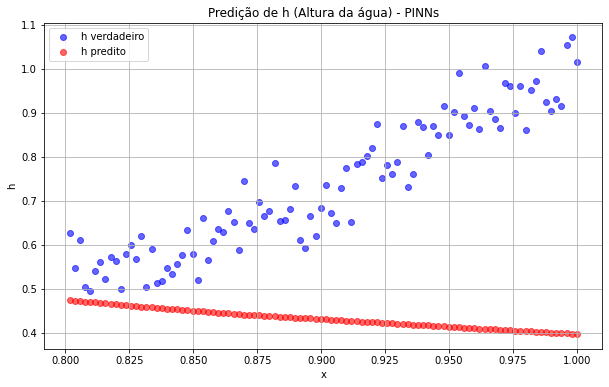

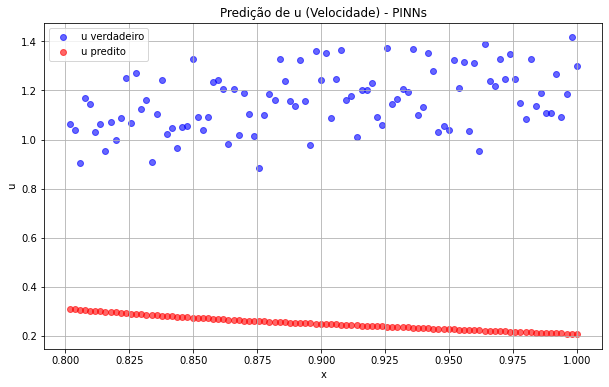

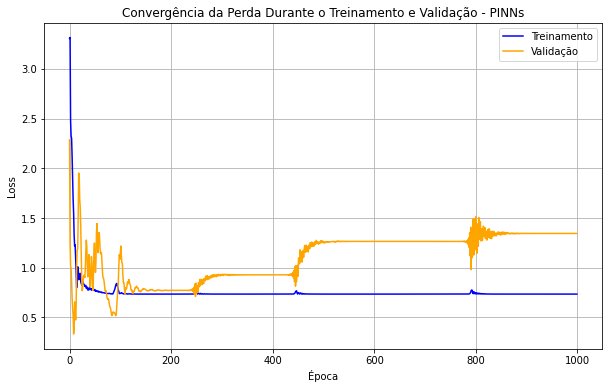

In [17]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Gerando dados sintéticos para as equações de Saint-Venant
# Para simplificar, vamos considerar soluções conhecidas no intervalo [0, 1]
x_full = np.linspace(0, 1, 500)

# Função altura da água (h) e velocidade (u) como dados de entrada
true_h = lambda x: 1 + 0.5 * np.sin(2 * np.pi * x)
true_u = lambda x: 1 + 0.2 * np.cos(2 * np.pi * x)

h_full = true_h(x_full)  # Altura
gu_full = true_u(x_full)  # Velocidade

# Adicionando ruído aos dados para simular medições reais
h_full += np.random.normal(0, 0.05, size=h_full.shape)
u_full += np.random.normal(0, 0.05, size=u_full.shape)

# Dividindo os dados em treino, validação e teste
train_split = int(len(x_full) * 0.6)
val_split = int(len(x_full) * 0.8)

x_train = x_full[:train_split]
h_train = h_full[:train_split]
gu_train = u_full[:train_split]

x_val = x_full[train_split:val_split]
h_val = h_full[train_split:val_split]
gu_val = u_full[train_split:val_split]

x_test = x_full[val_split:]
h_test = h_full[val_split:]
gu_test = u_full[val_split:]

# Convertendo dados para tensores PyTorch
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
h_train_tensor = torch.tensor(h_train, dtype=torch.float32).unsqueeze(1)
gu_train_tensor = torch.tensor(gu_train, dtype=torch.float32).unsqueeze(1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)
h_val_tensor = torch.tensor(h_val, dtype=torch.float32).unsqueeze(1)
gu_val_tensor = torch.tensor(gu_val, dtype=torch.float32).unsqueeze(1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
h_test_tensor = torch.tensor(h_test, dtype=torch.float32).unsqueeze(1)
gu_test_tensor = torch.tensor(gu_test, dtype=torch.float32).unsqueeze(1)

# Definindo a rede neural para prever h e u
class SaintVenantPINN(nn.Module):
    def __init__(self, neurons_per_layer, activations):
        super(SaintVenantPINN, self).__init__()

        layers = []
        input_dim = 1  # x como entrada

        for i, n_neurons in enumerate(neurons_per_layer):
            layers.append(nn.Linear(input_dim, n_neurons))
            if activations[i].lower() == "relu":
                layers.append(nn.ReLU())
            elif activations[i].lower() == "tanh":
                layers.append(nn.Tanh())
            elif activations[i].lower() == "sigmoid":
                layers.append(nn.Sigmoid())
            else:
                raise ValueError(f"Função de ativação desconhecida: {activations[i]}")
            input_dim = n_neurons

        # Saída para h e u
        layers.append(nn.Linear(input_dim, 2))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Hiperparâmetros
neurons_per_layer = [64, 64, 64]  # Número de neurônios por camada
activations = ["relu", "relu", "relu"]  # Funções de ativação

# Inicializando o modelo
model = SaintVenantPINN(neurons_per_layer, activations)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Função de custo considerando dados e equações físicas
def pinn_loss(model, x, h, u, lambda_phys=1.0):
    # Garante que x rastreie gradientes
    x = x.clone().detach().requires_grad_(True)

    # Previsões da rede
    predictions = model(x)
    h_pred, u_pred = predictions[:, 0], predictions[:, 1]

    # Perda baseada nos dados
    data_loss = nn.MSELoss()(h_pred, h) + nn.MSELoss()(u_pred, u)

    # Perda baseada na física: conservação de massa e quantidade de movimento
    dh_dx = torch.autograd.grad(outputs=h_pred, inputs=x, grad_outputs=torch.ones_like(h_pred), create_graph=True)[0]
    du_dx = torch.autograd.grad(outputs=u_pred, inputs=x, grad_outputs=torch.ones_like(u_pred), create_graph=True)[0]

    mass_conservation = dh_dx + h_pred * u_pred
    momentum_conservation = du_dx + h_pred  # Simplificado para demonstração

    physics_loss = (nn.MSELoss()(mass_conservation, torch.zeros_like(mass_conservation)) +
                    nn.MSELoss()(momentum_conservation, torch.zeros_like(momentum_conservation)))

    return data_loss + lambda_phys * physics_loss

# Treinando a rede neural
num_epochs = 1000
lambda_phys = 10.0
loss_history_train = []
loss_history_val = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    optimizer.zero_grad()
    loss_train = pinn_loss(model, x_train_tensor, h_train_tensor, gu_train_tensor, lambda_phys=lambda_phys)
    loss_train.backward()
    optimizer.step()

    loss_history_train.append(loss_train.item())

    # Validação
    model.eval()
    loss_val = pinn_loss(model, x_val_tensor, h_val_tensor, gu_val_tensor, lambda_phys=lambda_phys)
    loss_history_val.append(loss_val.item())

    # Exibindo progresso
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss Treino: {loss_train.item():.4f}, Validação: {loss_val.item():.4f}")

# Avaliando o modelo
model.eval()
with torch.no_grad():
    test_predictions = model(x_test_tensor)
    h_test_pred = test_predictions[:, 0].numpy()
    u_test_pred = test_predictions[:, 1].numpy()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_test, h_test, label="h verdadeiro", color="blue", alpha=0.6)
plt.scatter(x_test, h_test_pred, label="h predito", color="red", alpha=0.6)
plt.xlabel("x")
plt.ylabel("h")
plt.title("Predição de h (Altura da água) - PINNs")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_test, gu_test, label="u verdadeiro", color="blue", alpha=0.6)
plt.scatter(x_test, u_test_pred, label="u predito", color="red", alpha=0.6)
plt.xlabel("x")
plt.ylabel("u")
plt.title("Predição de u (Velocidade) - PINNs")
plt.legend()
plt.grid()
plt.show()

# Plotando as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history_train, label="Treinamento", color="blue")
plt.plot(range(num_epochs), loss_history_val, label="Validação", color="orange")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Convergência da Perda Durante o Treinamento e Validação - PINNs")
plt.legend()
plt.grid()
plt.show()
